In [2]:
import pandas as pd
import numpy as np
# import random
import scipy as sp
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.svm  import SVR
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor




در این فاز از پروژه تکنیک‌های مختلف ماشین لرنینگ را بر روی داده‌هایمان امتحان می‌کنیم. 
در دوره‌‌ی 

NISQ

و وقتی هنوز منابع کافی برای روش‌های تصحیح خطای کوانتومی نداریم، یکی از کارهای رایج برای استفاده از برتری سیستم‌های کوانتومی استفاده از روش‌های

Quantum Error Mitigation

است. یکی از کارهای استفاده شده برای این کار استفاده‌های از روش‌های یادگیری ماشین است، مانند کار مقاله‌ی اخیر 
[1]
که توسط گروهی در 

IBM

انجام شده است.

ما در پروژه‌ی این درس با شبیه‌سازی ساده‌تری روی تعداد کمی کیوبیت (۲) به دنبال دیدن اثر روش‌های یادگیری ماشین روی این مسئله هستیم. این می‌تواند مقدمه‌ی ورودمان به 

QEM

باشد.

متریک مورد علاقه‌ی ما قاعدتا همان 
acurracy
است. در این مسئله به طور خاص تفاوتی بین قدرت پیشبینی و دقت و این موارد برایمان وجود ندارد و همان 
acurray
را به عنوان متریک می‌گیریم.

اینجا داده را بارگذاری می‌کنیم و فیچرها و لیبل‌ها را مشخص می‌کنیم. بعد هم داده‌های تست و ترین را جدا می‌کنیم. برای چک کردن چند مورد را پرینت می‌کنیم. موارد موجود فعلی در کد برای نویز زیادمان اجرا شده‌اند (به دلیل پیچیده‌تر شدن پیشبینی این را گذاشتیم و هم اینکه به نظر مقادیر دیگر خطا در آزمایش‌های واقعی فعلی خیلی دور از واقعیت هستند).

In [50]:
noise_std = 0.1

df = pd.read_csv('Tomography - noise_' + str(noise_std) + ' - No of removed measurements_0.csv')


df = df.drop('Unnamed: 0', axis=1)

# df = df.sample(n=10000)
df = df.sample(n=20000)

print(df)

# X = df[["feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].multiply(1/df['feature1'], axis="index").to_numpy()

X = df[["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].to_numpy()


Y = df[["label1", "label2", "label3", "label4", "label5", "label6", "label7", "label8", "label9", "label10", "label11", "label12", "label13", "label14", "label15", "label16"]].to_numpy()

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


free_params = 16

# print(X[0])

       feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
6875   0.282221  0.245615  0.328518  0.202225  0.197829  0.196251  0.350738   
7961   0.182009  0.610216  0.283315  0.288363  0.320239  0.118966  0.155179   
63983  0.080492  0.558051  0.056745  0.128661  0.133675  0.469979  0.251594   
29199  0.240811  0.546981  0.538299  0.533321  0.173559  0.446638  0.258191   
83530  0.272312  0.223348  0.055761  0.202368  0.208411  0.346589  0.453288   
...         ...       ...       ...       ...       ...       ...       ...   
67084  0.331482  0.330791  0.440480  0.488400  0.146937  0.356597  0.261143   
29863  0.253047  0.192283  0.168016  0.020672  0.607908  0.095149  0.370086   
88824  0.271437  0.448918  0.114985  0.246101  0.253249  0.071384  0.217708   
48652  0.479647  0.586673  0.156058  0.258368  0.203112  0.257006 -0.046217   
53909  0.173973  0.417169  0.311789  0.509292  0.116918  0.188623  0.103024   

       feature8  feature9  feature10  ...    label7

In [9]:
print(X)
print(Y)

[[ 0.36021004  0.18525604  0.46004792 ...  0.37169932  0.01212476
   0.2509475 ]
 [ 0.18316001  0.04948473  0.13402611 ...  0.27028697  0.19831485
   0.1991785 ]
 [ 0.3170193   0.37440653  0.21051195 ...  0.21749798  0.16116635
   0.30791417]
 ...
 [ 0.19387948  0.02640618 -0.22675961 ...  0.22460312  0.18864726
   0.52711172]
 [ 0.45053579  0.38618335  0.21550925 ...  0.32944406  0.35732761
  -0.15370092]
 [ 0.71310809  0.09830402  0.78411679 ...  0.18551987  0.48345202
   0.12587136]]
[[0.20520772 0.30156288 0.37937953 ... 0.25344701 0.12934532 0.26725558]
 [0.24109173 0.20162929 0.19457792 ... 0.17943239 0.1566168  0.2086021 ]
 [0.32695779 0.26773524 0.21834567 ... 0.31106296 0.21699046 0.38860118]
 ...
 [0.16549376 0.10032894 0.02202469 ... 0.13415508 0.12776541 0.49711917]
 [0.46910969 0.32798787 0.23583157 ... 0.32519784 0.25814322 0.00392205]
 [0.7402095  0.13538481 0.71421617 ... 0.20959174 0.48301157 0.22068237]]


در اینجا رگرسیون خطی را امتحان می‌کنیم. چند درجه‌ی مختلف چندجمله‌ای متناظر با چند پیچیدگی مختلف را امتحان می‌کنیم. در اینجا چون تعداد فیچرهای مسُله‌ی مان زیاد است درجات بالاتر چند جمله‌ای را عملا کامپیوتر نمی‌توانست حساب کند. به این دلیل در این بخش یک پنجم کل داده را در نظر گرفتیم و نسبت داده‌های تست را هم ۰.۲ کردیم.

Linear Regression

In [6]:
# deg = 5
# regr = Pipeline([('poly', PolynomialFeatures(degree=deg) ), ('model', LinearRegression() )])
# regr.fit( X_train, Y_train )





regr = MultiOutputRegressor(SGDRegressor(learning_rate='adaptive'), n_jobs=-1)


list_of_degrees = np.arange(1, 6)

test_scores_reg = np.zeros(len(list_of_degrees))
train_scores_reg = np.zeros(len(list_of_degrees))

for degree in range(len(list_of_degrees)):
    degree_of_polynomial = list_of_degrees[degree]

    poly = PolynomialFeatures(degree_of_polynomial)
    X_train_new = poly.fit_transform(X_train)
    X_test_new = poly.fit_transform(X_test)

    print(X.shape, X_train_new.shape)

    regr = MultiOutputRegressor(SGDRegressor(learning_rate='adaptive'), n_jobs=-1).fit(X_train_new, Y_train)


    ##### Y_pred_train = regr.predict(X_train_new )
    ##### Y_pred_test = regr.predict(X_test_new )
    train_scores_reg[degree] = regr.score(X_train_new, Y_train)
    test_scores_reg[degree] = regr.score(X_test_new, Y_test)

    ##### train_scores_reg[degree] = np.sum((Y_train-Y_pred_train)**2)/len(Y_train)
    ##### test_scores_reg[degree] = np.sum((Y_test-Y_pred_test)**2)/len(Y_test)


(20000, 16) (16000, 17)
(20000, 16) (16000, 153)
(20000, 16) (16000, 969)
(20000, 16) (16000, 4845)
(20000, 16) (16000, 20349)


[]

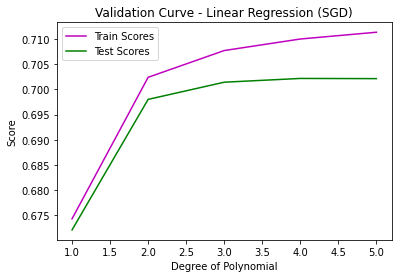

In [7]:


plt.plot(list_of_degrees, train_scores_reg, color='m', label='Train Scores') 
plt.plot(list_of_degrees, test_scores_reg, color='g', label='Test Scores') 

plt.title('Validation Curve - Linear Regression (SGD)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Score')
plt.legend()

plt.plot()


همانطور که از نمودار دیده می‌شود، چندجمله‌ای درجه‌ی ۲ می‌تواند بهترین انتخاب باشد. 

منحنی یادگیری را هم در پایین رسم می‌کنیم. اینجا البته دیگر چون نتیجه چند جمله‌ای درجه ۲ شد و مشکل خاصی نیست از کل داده استفاده می‌کنیم.

In [11]:
degree_of_polynomial = 2

poly = PolynomialFeatures(degree_of_polynomial)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

print(X.shape, X_train_new.shape)

regr = MultiOutputRegressor(SGDRegressor(learning_rate='adaptive'), n_jobs=-1).fit(X_train_new, Y_train)

print(X.shape, X_train_new.shape)

train_frac = np.linspace(0.1, 1.0, 10)

train_size_abs, train_scores, test_scores = learning_curve(regr, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

(100000, 16) (85000, 153)
(100000, 16) (85000, 153)


In [12]:
# print(train_size_abs, test_scores, test_scores.mean(axis=1))

test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

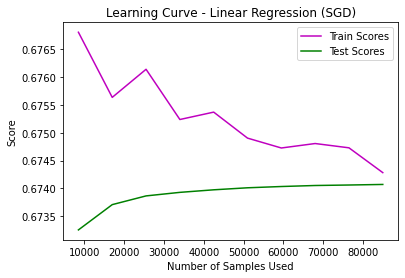

In [13]:
samples_used = train_frac * len(X_train)

# plt.clf()

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Linear Regression (SGD)')
plt.xlabel('Number of Samples Used')
plt.ylabel('Score')
plt.legend()

plt.plot()

طبق منحنی یادگیری بالا، داده‌هایمان کافی هستند. حتی مقدار کمتری از داده هم کافی بود. در این بازه‌ی داده شده خیلی تفاوت خاصی مشاهده نمی‌شود.

در ادامه کار مشابهی را برای
KNN
می‌کنیم. 

برای چند پیچیدگی مختلف نمودار 
validation
را رسم می‌کنیم

KNN

In [28]:
list_of_neighbors = np.arange(1, 30, 5)

test_scores_knn_normal = np.zeros(len(list_of_neighbors))
train_scores_knn_normal = np.zeros(len(list_of_neighbors))

# test_scores_knn_distance = np.zeros(len(list_of_neighbors))
# train_scores_knn_distance = np.zeros(len(list_of_neighbors))

for neighbors in range(len(list_of_neighbors)):

    number_of_neighbors = list_of_neighbors[neighbors]


    neigh_normal = KNeighborsRegressor(n_neighbors= number_of_neighbors, weights='uniform', n_jobs=-1)
    neigh_normal.fit(X_train, Y_train)

    # neigh_distance = KNeighborsRegressor(n_neighbors= number_of_neighbors, weights='distance')
    # neigh_distance.fit(X_train, Y_train)

    print(neighbors+1, len(list_of_neighbors))

    

    train_scores_knn_normal[neighbors] = neigh_normal.score(X_train, Y_train)
    test_scores_knn_normal[neighbors] = neigh_normal.score(X_test, Y_test)

    # train_scores_knn_distance[neighbors] = neigh_distance.score(X_train, Y_train)
    # test_scores_knn_distance[neighbors] = neigh_distance.score(X_test, Y_test)

1 6
2 6
3 6
4 6
5 6
6 6


[]

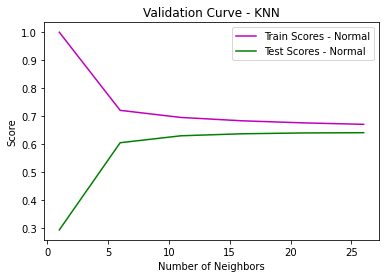

In [29]:
plt.plot(list_of_neighbors, train_scores_knn_normal, color='m', label='Train Scores - Normal') 
plt.plot(list_of_neighbors, test_scores_knn_normal, color='g', label='Test Scores - Normal') 

# plt.plot(list_of_neighbors, train_scores_knn_distance, color='c', label='Train Scores - Distance') 
# plt.plot(list_of_neighbors, test_scores_knn_distance, color='b', label='Test Scores - Distance') 

plt.title('Validation Curve - KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()

plt.plot()

طبق نمودار بالا، به نظر تعداد همسایه‌های حدود 15 خوب کار می‌کند. در ادامه منحنی یادگیری را هم رسم می‌کنیم.

In [31]:
neigh_distance = KNeighborsRegressor(n_neighbors= 15, weights='uniform')



# train_size_abs, train_scores, test_scores = learning_curve(neigh_distance, X, Y, train_sizes=sizes_of_train)

train_frac = np.linspace(0.1, 1.0, 10)

train_size_abs, train_scores, test_scores = learning_curve(neigh_distance, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

In [32]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

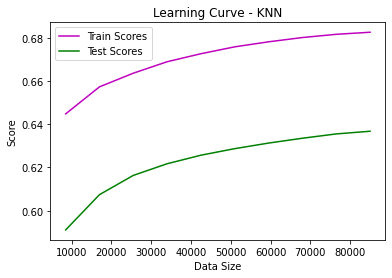

In [33]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - KNN')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

In [36]:
print(train_scores)
print(test_scores)

[0.64478674 0.65729039 0.66359693 0.66889526 0.67260275 0.67578458
 0.67810837 0.68008328 0.68157084 0.68253051]
[0.59113688 0.60744357 0.61634633 0.62173356 0.6256808  0.6287128
 0.6312861  0.6335251  0.63551994 0.63675491]


طبق منحنی مقدار داده‌هایمان بیشتر شود بهتر است. اول برای ۲۰ هزار امتحان کردیم که واضحا کافی نبود، کل داده را که گرفتیم بهتر شد ولی کامل نیست همچنان. کار مشابهی را برای بقیه‌ی فرضیه‌ها انجام می‌دهیم.

اینجا هم مشابه رگرسیون خطی تعداد داده‌ها را کم کردیم.

تاثیر متریک‌ها را هم چک می‌کنیم

In [45]:
neigh_cityblock = KNeighborsRegressor(n_neighbors= 15, metric='cityblock')
neigh_cityblock.fit(X_train, Y_train)

neigh_cosine = KNeighborsRegressor(n_neighbors= 15, metric='cosine')
neigh_cosine.fit(X_train, Y_train)

neigh_euclidean = KNeighborsRegressor(n_neighbors= 15, metric='euclidean')
neigh_euclidean.fit(X_train, Y_train)

neigh_l1 = KNeighborsRegressor(n_neighbors= 15, metric='l1')
neigh_l1.fit(X_train, Y_train)

neigh_l2 = KNeighborsRegressor(n_neighbors= 15, metric='l2')
neigh_l2.fit(X_train, Y_train)

neigh_manhattan = KNeighborsRegressor(n_neighbors= 15, metric='manhattan')
neigh_manhattan.fit(X_train, Y_train)

neigh_nan_euclidean = KNeighborsRegressor(n_neighbors= 15, metric='nan_euclidean')
neigh_nan_euclidean.fit(X_train, Y_train)



train_scores_knn_cityblock = neigh_cityblock.score(X_train, Y_train)
test_scores_knn_cityblock = neigh_cityblock.score(X_test, Y_test)

print('cityblock: ')
print(train_scores_knn_cityblock, test_scores_knn_cityblock)

train_scores_knn_cosine = neigh_cosine.score(X_train, Y_train)
test_scores_knn_cosine = neigh_cosine.score(X_test, Y_test)

print('cosine: ')
print(train_scores_knn_cosine, test_scores_knn_cosine)


train_scores_knn_euclidean = neigh_euclidean.score(X_train, Y_train)
test_scores_knn_euclidean = neigh_euclidean.score(X_test, Y_test)

print('euclidean: ')
print(train_scores_knn_euclidean, test_scores_knn_euclidean)



train_scores_knn_l1 = neigh_l1.score(X_train, Y_train)
test_scores_knn_l1 = neigh_l1.score(X_test, Y_test)

print('l1: ')
print(train_scores_knn_l1, test_scores_knn_l1)

train_scores_knn_l2 = neigh_l2.score(X_train, Y_train)
test_scores_knn_l2 = neigh_l2.score(X_test, Y_test)

print('l2: ')
print(train_scores_knn_l2, test_scores_knn_l2)


train_scores_knn_manhattan = neigh_manhattan.score(X_train, Y_train)
test_scores_knn_manhattan = neigh_manhattan.score(X_test, Y_test)

print('manhattan: ')
print(train_scores_knn_manhattan, test_scores_knn_manhattan)

train_scores_knn_nan_euclidean = neigh_nan_euclidean.score(X_train, Y_train)
test_scores_knn_nan_euclidean = neigh_nan_euclidean.score(X_test, Y_test)

print('nan_euclidean: ')
print(train_scores_knn_nan_euclidean, test_scores_knn_nan_euclidean)

cityblock: 
0.6496352784691473 0.6014216217027506
cosine: 
0.6377876645146501 0.5871979971312772
euclidean: 
0.6607488598487401 0.6130097058211816
l1: 
0.6496352784691473 0.6014216217027506
l2: 
0.6607488598487401 0.6130097058211816
manhattan: 
0.6496352784691473 0.6014216217027506
nan_euclidean: 
0.6607488598487401 0.6130097058211816


همانطور که میبینیم تفاوت فاحشی وجود ندارد. اما 

l2

و

nan_euclidean

بهتر از بقیه کار می‌کنند

Random Forest

In [28]:

# list_of_depth = np.array([1, 5, 10])

# list_of_depth = np.array([5, 10, 20, 22, 25])

list_of_depth = np.array([10, 15, 18, 20, 22])

test_scores_random_forest = np.zeros(len(list_of_depth))
train_scores_random_forest = np.zeros(len(list_of_depth))

for depth_count in range(len(list_of_depth)):
    depth = list_of_depth[depth_count]

    # X_train, Y_train = make_regression(shuffle=False)
    # X_train, Y_train = make_regression()
    regr_forest = RandomForestRegressor(max_depth= depth)
    regr_forest.fit(X_train, Y_train)

    print(depth_count+1, len(list_of_depth))

    
    
    train_scores_random_forest[depth_count] = regr_forest.score(X_train, Y_train)
    test_scores_random_forest[depth_count] = regr_forest.score(X_test, Y_test)



1 5
2 5
3 5
4 5
5 5


[]

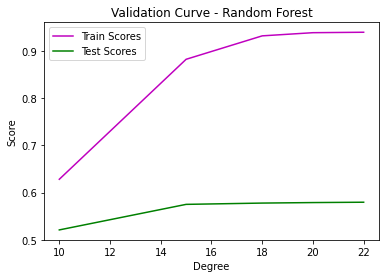

In [29]:


plt.plot(list_of_depth, train_scores_random_forest, color='m', label='Train Scores') 
plt.plot(list_of_depth, test_scores_random_forest, color='g', label='Test Scores') 

plt.title('Validation Curve - Random Forest')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()

plt.plot()

طبق نمودار، عمق حدود ۱۸ منطقی به نظر می‌رسد.

اما اورفیت داریم.

In [57]:
params_dist_random_forest = {'n_estimators' : [10, 30, 70]}



regr_forest = RandomForestRegressor(max_depth= 18)

opt_clf2 = GridSearchCV(regr_forest, param_grid=params_dist_random_forest, cv=4, n_jobs=-1)

opt_clf2.fit(X_train,Y_train)



GridSearchCV(cv=4, estimator=RandomForestRegressor(max_depth=18), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 70]})

In [59]:


print(opt_clf2.score(X_train, Y_train), opt_clf2.score(X_test, Y_test), opt_clf2.best_params_ )

0.9318458591076733 0.5864162477231596 {'n_estimators': 70}


In [60]:
params_dist_random_forest = {'n_estimators' : [100, 150, 200]}



regr_forest = RandomForestRegressor(max_depth= 18)

opt_clf2 = GridSearchCV(regr_forest, param_grid=params_dist_random_forest, cv=4, n_jobs=-1)

opt_clf2.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(max_depth=18), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]})

In [61]:
print(opt_clf2.score(X_train, Y_train), opt_clf2.score(X_test, Y_test), opt_clf2.best_params_ )

0.9347687949742995 0.5907237468132466 {'n_estimators': 200}


به نظر تغییر تعداد درخت‌ها با سرعت کمی مسئله را بهتر می‌کند و از نظر محاسباتی هم پیچیده است. سراغ کارهای دیگر می‌رویم

In [64]:
params_dist_random_forest = {'min_samples_leaf' : [1, 5, 10]}



regr_forest = RandomForestRegressor(max_depth= 18)

opt_clf2 = GridSearchCV(regr_forest, param_grid=params_dist_random_forest, n_jobs=-1)

opt_clf2.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=18), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 5, 10]})

In [65]:
print(opt_clf2.score(X_train, Y_train), opt_clf2.score(X_test, Y_test), opt_clf2.best_params_ )

0.933169270581403 0.5874895690335427 {'min_samples_leaf': 1}


In [66]:
params_dist_random_forest = {'min_samples_split' : [2, 5, 10]}



regr_forest = RandomForestRegressor(max_depth= 18)

opt_clf2 = GridSearchCV(regr_forest, param_grid=params_dist_random_forest, n_jobs=-1)

opt_clf2.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=18), n_jobs=-1,
             param_grid={'min_samples_split': [2, 5, 10]})

In [67]:
print(opt_clf2.score(X_train, Y_train), opt_clf2.score(X_test, Y_test), opt_clf2.best_params_ )

0.9328122264762176 0.5885203665360823 {'min_samples_split': 2}


تفاوت نسبتا زیادی بین نمره‌ی تست و ترین وجود دارد ولی با بازی کردن با پارامترهای مختلف نتوانستیم آن را رفع کنیم.

In [37]:
regr_forest = RandomForestRegressor(max_depth= 18)

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(neigh_distance, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)


In [38]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

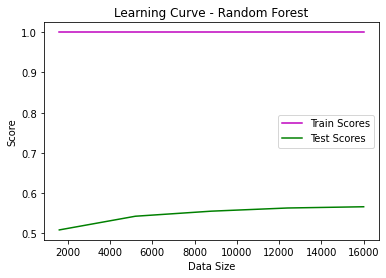

In [39]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Random Forest')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

In [40]:
print(train_scores)
print(test_scores)

[1. 1. 1. 1. 1.]
[0.50853662 0.54256393 0.55515727 0.56303913 0.56611616]


مجدد طبق نمودار داده‌های کافی داریم.

حتی همان ۲۰ هزارتا هم کافی است.

اینجا هم مشابه رگرسیون خطی از داده‌های کمتری استفاده می‌کنیم.

برای 
SVM
از ده هزار داده استفاده کردیم

SVM

In [73]:
params_dist = {'clf__estimator__C': expon(scale=10), 'clf__estimator__gamma':expon(scale=10)}


svr = SVR()

pipeline = Pipeline(  [('clf', MultiOutputRegressor(svr))]  )
opt_clf = RandomizedSearchCV(pipeline, param_distributions=params_dist, cv=5, n_jobs=-1)
opt_clf.fit(X_train,Y_train)


# best_C_for_different_labels = np.zeros(Y_train.shape[1])
# best_gamma_for_different_labels = np.zeros(Y_train.shape[1])
# train_scores_for_different_labels = np.zeros(Y_train.shape[1])
# test_scores_for_different_labels = np.zeros(Y_train.shape[1])

# for i in range(Y_train.shape[1]):

#     opt_clf = RandomizedSearchCV(svr, param_distributions=params_dist, cv=5, n_jobs=-1)
#     opt_clf.fit(X_train,Y_train[:, i])

#     # best_parameters_for_different_labels.append(opt_clf.best_params_)
#     best_parameters = opt_clf.best_params_

#     best_C_for_different_labels[i] = best_parameters['C']
#     best_gamma_for_different_labels[i] = best_parameters['gamma']

#     train_scores_for_different_labels[i] = opt_clf.score(X_train, Y_train[:, i])
#     test_scores_for_different_labels[i] = opt_clf.score(X_test, Y_test[:, i])

#     print(i+1, Y_train.shape[1])



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('clf',
                                              MultiOutputRegressor(estimator=SVR()))]),
                   n_jobs=-1,
                   param_distributions={'clf__estimator__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E995BF97C0>,
                                        'clf__estimator__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E9988318E0>})

In [74]:
best_pipeline = opt_clf.best_estimator_

best_parameters_svr = opt_clf.best_params_

In [75]:
best_C = best_parameters_svr['clf__estimator__C']
best_gamma = best_parameters_svr['clf__estimator__gamma']

In [76]:
opt_clf.score(X_train, Y_train)

0.7026888336952297

In [77]:
opt_clf.score(X_test, Y_test)

0.7061623502817573

Learning Curve of SVM

In [78]:

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(best_pipeline, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)


In [79]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

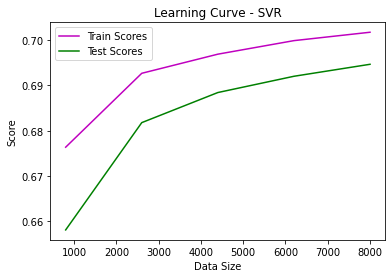

In [80]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - SVR')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

برای
SVM
مقدار داده‌هایمان کافی نیست. با ۲۰ هزارتا مجدد امتحان می‌کنیم. 



In [82]:
params_dist = {'clf__estimator__C': expon(scale=10), 'clf__estimator__gamma':expon(scale=10)}


svr = SVR()

pipeline = Pipeline(  [('clf', MultiOutputRegressor(svr))]  )
opt_clf = RandomizedSearchCV(pipeline, param_distributions=params_dist, cv=5, n_jobs=-1)
opt_clf.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('clf',
                                              MultiOutputRegressor(estimator=SVR()))]),
                   n_jobs=-1,
                   param_distributions={'clf__estimator__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E995B9D2B0>,
                                        'clf__estimator__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E995646FA0>})

In [84]:
best_pipeline = opt_clf.best_estimator_

best_parameters_svr = opt_clf.best_params_

In [85]:
best_C = best_parameters_svr['clf__estimator__C']
best_gamma = best_parameters_svr['clf__estimator__gamma']

In [86]:
opt_clf.score(X_train, Y_train)

0.720500718941699

In [87]:
opt_clf.score(X_test, Y_test)

0.6753428621346117

In [88]:
train_frac = np.linspace(0.5, 1.0, 3)

train_size_abs, train_scores, test_scores = learning_curve(best_pipeline, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

In [89]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

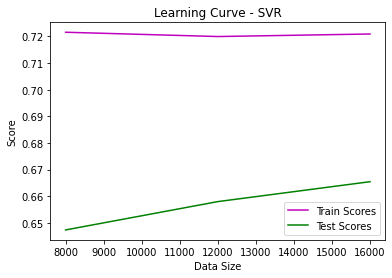

In [90]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - SVR')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

In [91]:
print(train_scores)
print(test_scores)

[0.72156145 0.71995028 0.72090453]
[0.64738896 0.65801461 0.66548155]


با ترکیب دو نمودار اخیر به نظر همچنان داده‌ی بیشتر نتیجه‌ی بهتری خواهد داد. اما به دلیل اینکه زمان اجرای آن خیلی طولانی می‌شود عملا نمی‌توان چنین حالتی را امتحان کرد.

Decision Tree

In [62]:
list_of_depth = np.array([10, 15, 16, 17, 18, 20, 22, 25, 30])

test_scores_tree = np.zeros(len(list_of_depth))
train_scores_tree = np.zeros(len(list_of_depth))

for depth_count in range(len(list_of_depth)):
    depth = list_of_depth[depth_count]

    # X_train, Y_train = make_regression(shuffle=False)
    # X_train, Y_train = make_regression()
    regr_tree = DecisionTreeRegressor(max_depth= depth)
    regr_tree.fit(X_train, Y_train)

    print(depth_count+1, len(list_of_depth))

    
    
    train_scores_tree[depth_count] = regr_tree.score(X_train, Y_train)
    test_scores_tree[depth_count] = regr_tree.score(X_test, Y_test)

1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


[]

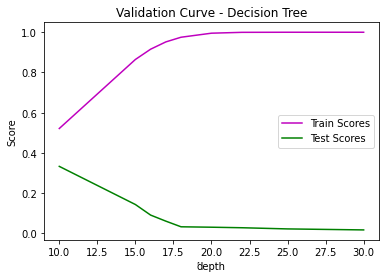

In [65]:
plt.plot(list_of_depth, train_scores_tree, color='m', label='Train Scores') 
plt.plot(list_of_depth, test_scores_tree, color='g', label='Test Scores') 

plt.title('Validation Curve - Decision Tree')
plt.xlabel('ٔdepth')
plt.ylabel('Score')
plt.legend()

plt.plot()

In [66]:
list_of_depth = np.array([1, 5, 7, 9, 10, 12, 15])

test_scores_tree = np.zeros(len(list_of_depth))
train_scores_tree = np.zeros(len(list_of_depth))

for depth_count in range(len(list_of_depth)):
    depth = list_of_depth[depth_count]

    # X_train, Y_train = make_regression(shuffle=False)
    # X_train, Y_train = make_regression()
    regr_tree = DecisionTreeRegressor(max_depth= depth)
    regr_tree.fit(X_train, Y_train)

    print(depth_count+1, len(list_of_depth))

    
    
    train_scores_tree[depth_count] = regr_tree.score(X_train, Y_train)
    test_scores_tree[depth_count] = regr_tree.score(X_test, Y_test)

1 7
2 7
3 7
4 7
5 7
6 7
7 7


[]

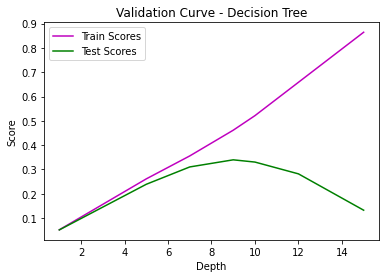

In [68]:
plt.plot(list_of_depth, train_scores_tree, color='m', label='Train Scores') 
plt.plot(list_of_depth, test_scores_tree, color='g', label='Test Scores') 

plt.title('Validation Curve - Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend()

plt.plot()

حدود عمق ۹ احتمالا بهترین گزینه هست

In [69]:
regr_tree = DecisionTreeRegressor(max_depth= 9)

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(regr_tree, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

In [70]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

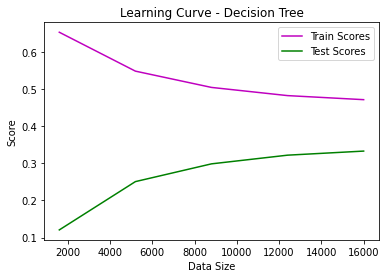

In [71]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Decision Tree')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

داده‌ها کافی است

برای مقایسه، متریک همه 

acurracy

است.

برای بقیه‌ی مقایسه‌ها:


In [46]:
print('LinearRegression SGD: ' + 'test_scores: ' + str(0.695) + ' - train scores: ' + str(0.7) + '- optimization time: ' + str(98) +'s' )
print('KNN: ' + 'test_scores: ' + str(0.61) + ' - train scores: ' + str(0.66) + '- optimization time: ' + str(140) +'s' )
print('Random Forest: ' + 'test_scores: ' + str(0.58) + ' - train scores: ' + str(0.95) + '- optimization time: ' + str(150) +'s')
print('SVR: ' + 'test_scores: ' + str(0.68) + ' - train scores: ' + str(0.72) + '- optimization time: ' + str(510) + 's' )
print('Decision Tree: ' + 'test_scores: ' + str(0.3) + ' - train scores: ' + str(0.4) + '- optimization time: ' + str(3) +'s' )

LinearRegression SGD: test_scores: 0.695 - train scores: 0.7- optimization time: 98s
KNN: test_scores: 0.61 - train scores: 0.66- optimization time: 140s
Random Forest: test_scores: 0.58 - train scores: 0.95- optimization time: 150s
SVR: test_scores: 0.68 - train scores: 0.72- optimization time: 510s
Decision Tree: test_scores: 0.3 - train scores: 0.4- optimization time: 3s


سرجمع رگرسیون خطی و رندوم فارست و 

SVR

بهتر از بقیه عمل کردند. 

SVR

زمان اجرا شدن آن خیلی طولانی بود. 

درخت تصمیم گیری که نتیجه‌ی آن خیلی بد بود در مقایسه با بقیه و شاید قابل پیشبینی هم بود. 

KNN

هم به نسبت بقیه خیلی شاید بد نبود.

رندوم فارست واریانس خیلی زیادی دارد اما بایاس آن کم است.

رگرسیون خطی و 

SVR

هم واریانس زیادی ندارند.